## Data In Motion Week 5 Pandas' Challenge

Challenge Questions

1.    Set PassengerId as the index.
2.    Create a pie chart presenting the male/female as proportions
3.    Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
4.    How many people survived?
5.    Create a histogram with the Fare payed
6.    BONUS: Create your own question and answer it.

In [1]:
# Packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, geom_point, aes, geom_smooth, facet_wrap, labs, theme_bw, geom_histogram

In [2]:
# Reading in data
data_link = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
df = pd.read_csv(data_link)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
'''There are 891 entries
12 different variables'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'There are 891 entries\n12 different variables'

## Challenge 1: Set PassengerId as the index.

In [5]:
df = df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Challenge 2: Create a pie chart presenting the male/female as proportions

<AxesSubplot:title={'center':'Sex - Pie Chart'}, ylabel='Sex'>

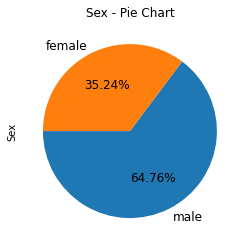

In [6]:
plt.figure(figsize = (15, 4))
plt.title('Sex - Pie Chart')
df['Sex'].value_counts().plot.pie(y='Sex', autopct='%.2f%%', startangle=180, fontsize=12) 

## Challenge 3: Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

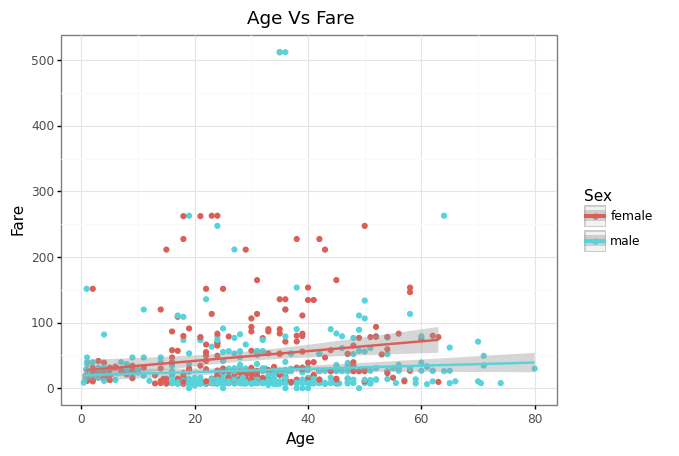

<ggplot: (8774701143529)>

In [7]:
# df.groupby(['Age',''])
# plt.text(2, 6, 'Parabola $Y = x^2$', fontsize = 22)

ch3_plot = ggplot(df, aes('Age', 'Fare', color='Sex', style = 'Sex')) # x-axis y-axis
(
    ch3_plot + geom_point() 
          + geom_smooth(method='glm') # Using glm to construct a graphic of a linear model with a confidence interval
          + theme_bw()  
          + labs(title="Age Vs Fare") 
          )

## Challenge 4: How many people survived?

In [8]:
sur_ppl = df['Survived'].sum() # This column is binary
print('There were %d people who survived' % sur_ppl)

There were 342 people who survived


## Challenge 5: Create a histogram with the Fare payed

Skew : 4.79


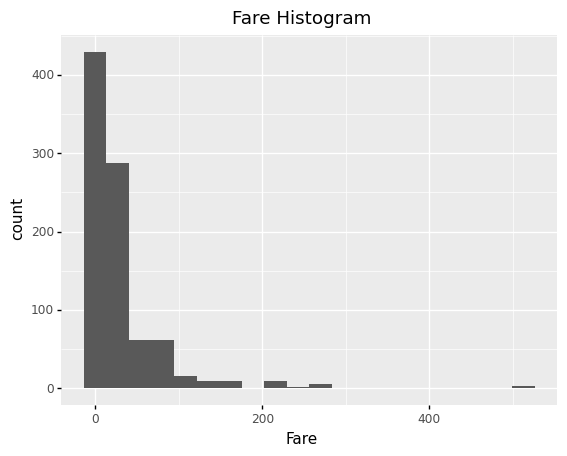

<ggplot: (8774696342813)>

In [9]:
# df['Fare'].hist(bins=40)
print('Skew :', round(df['Fare'].skew(), 2))
hist_gg = ggplot(df) + aes(x="Fare")
hist_gg + geom_histogram(bins=20) + labs(title="Fare Histogram") 

Note: 
    - This histogram is left skewed

## Challenge 6: What was the survival rate between Sex and how did they break out among the different classes (Pclass).

male      64.76
female    35.24
Name: Sex, dtype: float64


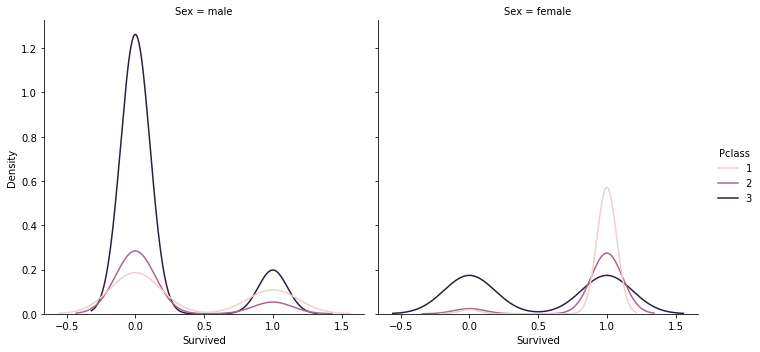

In [10]:
print(round((df['Sex'].value_counts() / df.shape[0])*100,2))
sns.displot(data=df, kind="kde", x="Survived", col="Sex", hue="Pclass")

Notes: 
    - About 65% of this dataset is made up of men. While about 35% are women.    
    - There are only peaks when the x-axis, Survivied, is 0 or 1. This is due to the Survived variable being a binary in nature.    
    - There are more women that survived then men.   
    - Most of the male deaths came from Pclass-3. While the life-to-death ratio for for Pclass-3 women appears to be the same.   
    - Pclass 1 had the highest women survival rate.   
    - Pclass-3 had the highest survival rate for the men.   
    - It would be really interesting to identify why there were more female survivors, and why are there such disparities between Pclass and Sex. Without any additonal information about the columns, it is hard to make any real inference or variable accurate correlation.   